/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_19197/2021938326.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.asfreq('D').fillna(method='ffill')


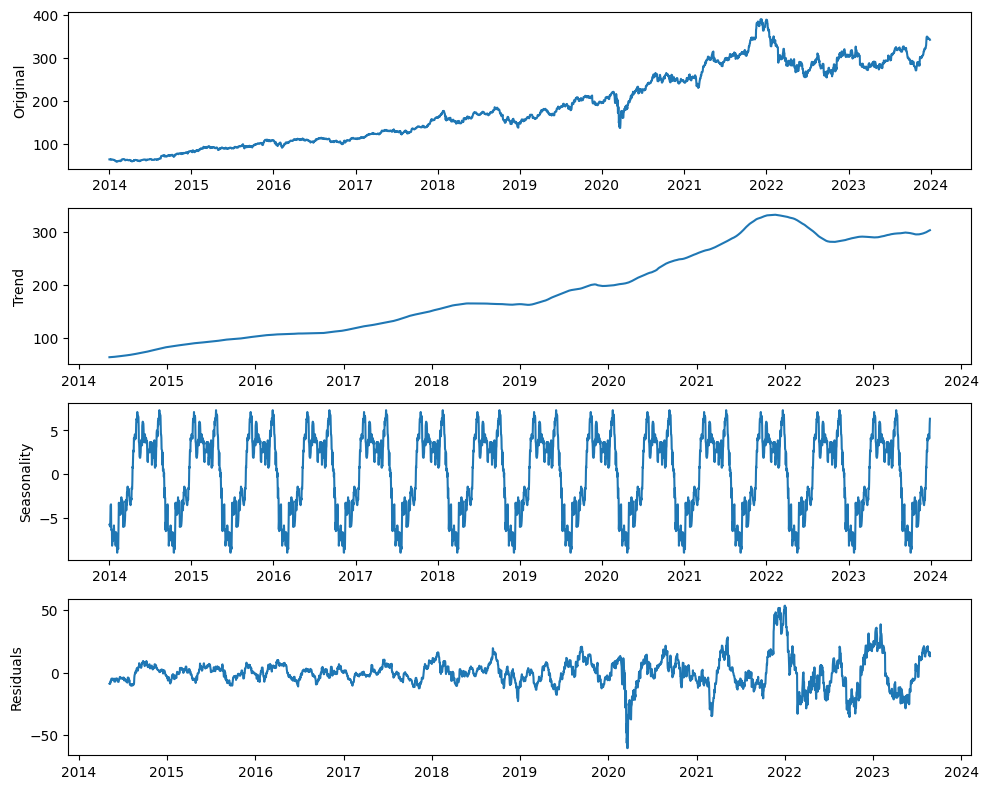

ADF Statistic: -0.645253235454816
p-value: 0.8604253708106886


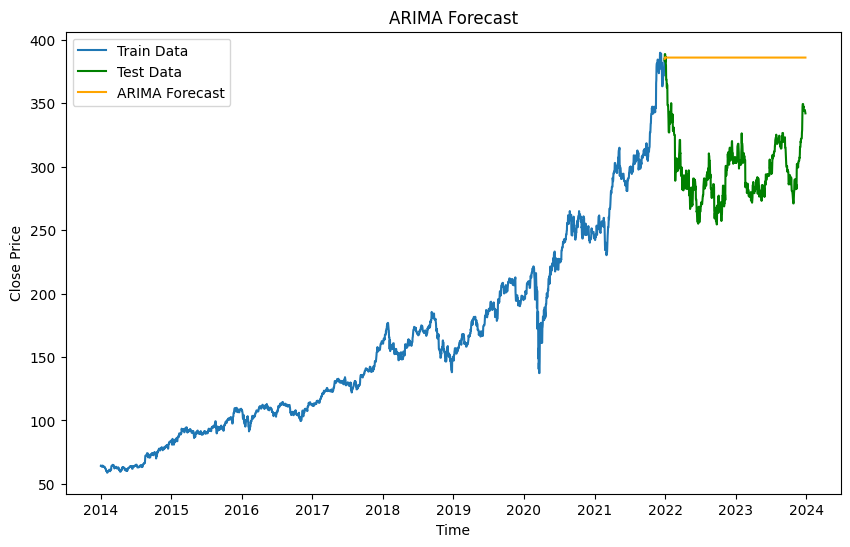

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Setting starting and ending dates
start_date = '2014-01-01'
end_date = '2024-01-01'

# Collecting historical stock market data for Home Depot Inc (ticker symbol "HD")
ticker = yf.Ticker("HD")
data = ticker.history(start=start_date, end=end_date)['Close'].to_frame()

# Filling missing values
data = data.asfreq('D').fillna(method='ffill')

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Plot decomposition components
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
axes[0].plot(data.index, data['Close'], label='Original')
axes[0].set_ylabel('Original')
axes[1].plot(data.index, trend, label='Trend')
axes[1].set_ylabel('Trend')
axes[2].plot(data.index, seasonal, label='Seasonality')
axes[2].set_ylabel('Seasonality')
axes[3].plot(data.index, residuals, label='Residuals')
axes[3].set_ylabel('Residuals')
plt.tight_layout()
plt.show()

# Augmented Dickey-Fuller (ADF) Testing
result = adfuller(data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Train/test spliting
train_size = int(len(data) * 0.8)
train = data['Close'][:train_size]
test = data['Close'][train_size:]

# Fit ARIMA model (update order as needed based on ADF results)
model_arima = ARIMA(train, order=(5, 1, 0))  
model_arima_fit = model_arima.fit()

# Forecasting
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Ploting ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, 'green', label='Test Data')
plt.plot(test.index, forecast_arima, 'orange', label='ARIMA Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast')
plt.show()
